# Ensemble feature viz first (for c1 and c2)

In [2]:
import molli as ml
import molli.visual
import molli.visual.backend_pyvista
import pyvista
import numpy as np
import matplotlib.pyplot as plt

### For c2 regularized models

In [3]:
selected = np.load("../aso-modeling-out/_target_fix_reruns/full_regularized/all_features.npy")
selected_IDW_1 = np.load("../aso-modeling-out/_target_fix_reruns/full_regularized/all_features_IDW_1.npy")
selected_IDW_2 = np.load("../aso-modeling-out/_target_fix_reruns/full_regularized/all_features_IDW_2.npy")
selected_IDW_3 = np.load("../aso-modeling-out/_target_fix_reruns/full_regularized/all_features_IDW_3.npy")

In [4]:
grid = np.load("grid.npy")

For whatever reason, a lot of features were selected in this run

In [5]:
ids = selected[:, 0].astype(int)
freq = selected[:, 1].astype(np.float64)
filtered = grid[ids]
print(len(filtered))

10352


In [10]:
more_than_twice = np.array([i for i in selected if i[1].astype(np.float64) > 2])
print(len(more_than_twice))

7770


In [7]:
more_ids = more_than_twice[:, 0].astype(int)
more_freqs = more_than_twice[:, 1].astype(int)

<BarContainer object of 7770 artists>

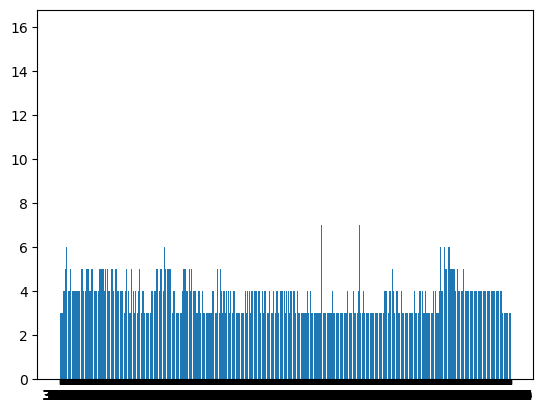

In [8]:
plt.bar(more_ids.astype(str), more_freqs)

Think about applying statistical analysis. I.e find out threshold of selection for features to be statistically significant

In [46]:
more_than_six = np.array([i for i in selected if i[1].astype(np.float64) > 6])
print(len(more_than_six))

47


In [47]:
more_ids = more_than_six[:, 0].astype(int)
more_freqs = more_than_six[:, 1].astype(int)

In [48]:
# gotta convert to frequency
# 24 feature selecting pipelines in full_reg
more_freqs = [float(i) / 24 for i in more_freqs]
more_freqs

[0.2916666666666667,
 0.4166666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.375,
 0.3333333333333333,
 0.4583333333333333,
 0.2916666666666667,
 0.3333333333333333,
 0.4166666666666667,
 0.4583333333333333,
 0.4583333333333333,
 0.4583333333333333,
 0.2916666666666667,
 0.4166666666666667,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.3333333333333333,
 0.6666666666666666,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.3333333333333333,
 0.375,
 0.4166666666666667,
 0.375,
 0.4166666666666667,
 0.5416666666666666,
 0.2916666666666667,
 0.3333333333333333,
 0.5416666666666666,
 0.4583333333333333,
 0.375,
 0.4583333333333333,
 0.2916666666666667,
 0.3333333333333333,
 0.4166666666666667,
 0.2916666666666667,
 0.3333333333333333,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667]

<BarContainer object of 47 artists>

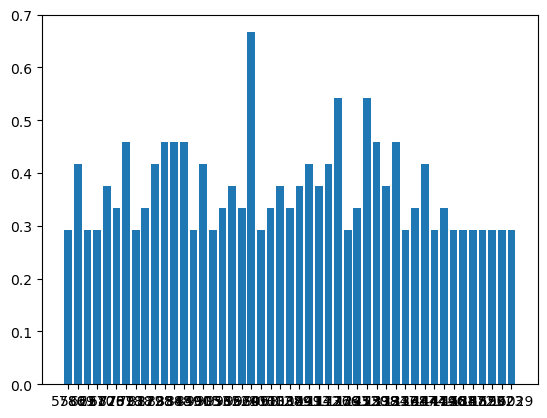

In [50]:
plt.bar(more_ids.astype(str), more_freqs)

In [51]:
filtered_more = grid[more_ids]

In [52]:
cloud = pyvista.PolyData(filtered_more)
cloud.point_data["values"] = more_freqs

In [123]:
plotter = pyvista.Plotter()

In [124]:
# Mess with coloration here (coolwarm -> RdYlGn)
# point_size kwarg (default is 5.0)
plotter.background_color = "slategrey"
scargs = {"color": "black"}
plotter.add_points(cloud, render_points_as_spheres=True, cmap="RdYlGn", 
                   clim=[min(more_freqs), max(more_freqs)], point_size=15, scalar_bar_args=scargs)



Actor (0x7f13acf03d60)
  Center:                     (2.959549903869629, 1.3513498306274414, 1.272900104522705)
  Pickable:                   True
  Position:                   (0.0, 0.0, 0.0)
  Scale:                      (1.0, 1.0, 1.0)
  Visible:                    True
  X Bounds                    -4.540E+00, 1.046E+01
  Y Bounds                    -6.149E+00, 8.851E+00
  Z Bounds                    -6.227E+00, 8.773E+00
  User matrix:                Unset
  Has mapper:                 True

Property (0x7f13acf02440)
  Ambient:                     0.0
  Ambient color:               Color(name='white', hex='#ffffffff', opacity=255)
  Anisotropy:                  0.0
  Color:                       Color(name='white', hex='#ffffffff', opacity=255)
  Culling:                     "none"
  Diffuse:                     1.0
  Diffuse color:               Color(name='white', hex='#ffffffff', opacity=255)
  Edge color:                  Color(name='black', hex='#000000ff', opacity=255)
  Int

In [126]:
plotter.show()

Widget(value="<iframe src='http://localhost:33757/index.html?ui=P_0x7f139f854b10_21&reconnect=auto' style='wid…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


In [116]:
SI_lib = ml.ConformerLibrary("../nbo-cu-box-clean/caseys/conformers_no_linker.mlib")
SI_lib["aa_1"][0] # aa_1 is just my go to

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Conformer(name='aa_1', formula='C21 H18 N2 O2')

In [125]:
ml.visual.backend_pyvista.plot_structure_as_wireframe(plotter, SI_lib["aa_1"][0])

In [41]:
plotter.show()

A view with name (P_0x7f139fc562d0_5) is already registered
 => returning previous one


Widget(value="<iframe src='http://localhost:33757/index.html?ui=P_0x7f139fc562d0_5&reconnect=auto' style='widt…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


In [ ]:
plotter.save_graphic("c2.svg")

### Now for same models but w/ c1

In [128]:
c1_selected = np.load("../aso-modeling-out/_target_fix_reruns/half_regularized/all_features.npy")
c1_selected_IDW_1 = np.load("../aso-modeling-out/_target_fix_reruns/half_regularized/all_features_IDW_1.npy")
c1_selected_IDW_2 = np.load("../aso-modeling-out/_target_fix_reruns/half_regularized/all_features_IDW_2.npy")
c1_selected_IDW_3 = np.load("../aso-modeling-out/_target_fix_reruns/half_regularized/all_features_IDW_3.npy")

In [129]:
c1_grid = np.load("../grid_testing/casey_redo_all_halved.npy")
c1_grid.shape

(14976, 3)

In [130]:
c1_ids = c1_selected[:, 0].astype(int)
c1_freq = c1_selected[:, 1].astype(np.float64)
c1_filtered = c1_grid[c1_ids]
print(len(c1_filtered))

1595


In [174]:
c1_six = np.array([i for i in c1_selected if i[1].astype(np.float64) > 8])
print(len(c1_six))

50


In [175]:
c1_more_ids = c1_six[:, 0].astype(int)
c1_more_freqs = c1_six[:, 1].astype(int)
c1_more_freqs = [float(i) / 24 for i in c1_more_freqs]  # converting to frequency

In [176]:
print(c1_more_freqs)

[0.375, 0.375, 0.375, 0.375, 0.5833333333333334, 0.625, 0.625, 0.375, 0.4166666666666667, 0.375, 0.5, 0.4166666666666667, 0.8333333333333334, 0.375, 0.4166666666666667, 0.375, 0.4166666666666667, 0.5833333333333334, 0.375, 0.375, 0.375, 0.4583333333333333, 0.5, 0.375, 0.4166666666666667, 0.7083333333333334, 0.4583333333333333, 0.4166666666666667, 0.5, 0.5416666666666666, 0.5, 0.5, 0.5416666666666666, 0.5, 0.4583333333333333, 0.4166666666666667, 0.4583333333333333, 0.5416666666666666, 0.4583333333333333, 0.375, 0.5416666666666666, 0.5, 0.375, 0.4166666666666667, 0.375, 0.4583333333333333, 0.375, 0.375, 0.4583333333333333, 0.5]


! C1 run has additional "blank" outlier run compared to C2 run, but LOF is equivalent to blank, so extra unneccesary runs !

^ I fixed it with the "_skip" arrays

<BarContainer object of 50 artists>

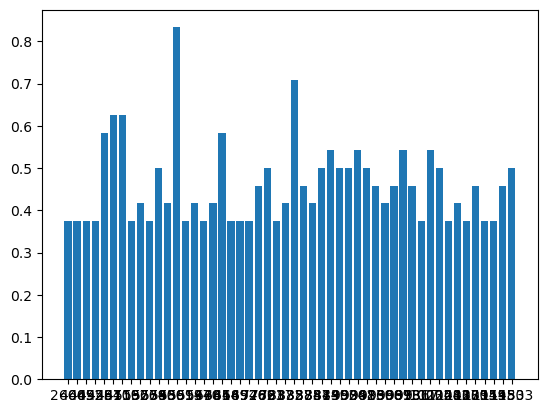

In [177]:
plt.bar(c1_more_ids.astype(str), c1_more_freqs)

In [178]:
c1_filtered_more = c1_grid[c1_more_ids]

In [179]:
cloud = pyvista.PolyData(c1_filtered_more)
cloud.point_data["values"] = c1_more_freqs

In [180]:
plotter = pyvista.Plotter()

In [181]:
plotter.background_color = "slategrey"
scargs = {"color": "black"}
plotter.add_points(cloud, render_points_as_spheres=True, cmap="RdYlGn", 
                   clim=[min(c1_more_freqs), max(c1_more_freqs)], point_size=15, scalar_bar_args=scargs)


Actor (0x7f139ca55f00)
  Center:                     (2.0226998329162598, 1.6727499961853027, 1.272900104522705)
  Pickable:                   True
  Position:                   (0.0, 0.0, 0.0)
  Scale:                      (1.0, 1.0, 1.0)
  Visible:                    True
  X Bounds                    -4.477E+00, 8.523E+00
  Y Bounds                    -5.327E+00, 8.673E+00
  Z Bounds                    -6.227E+00, 8.773E+00
  User matrix:                Unset
  Has mapper:                 True

Property (0x7f13cbe51c00)
  Ambient:                     0.0
  Ambient color:               Color(name='white', hex='#ffffffff', opacity=255)
  Anisotropy:                  0.0
  Color:                       Color(name='white', hex='#ffffffff', opacity=255)
  Culling:                     "none"
  Diffuse:                     1.0
  Diffuse color:               Color(name='white', hex='#ffffffff', opacity=255)
  Edge color:                  Color(name='black', hex='#000000ff', opacity=255)
  In

In [182]:
halved_SI = ml.ConformerLibrary("../nbo-cu-box-clean/halve_testing/halved_fixed.mlib")

In [183]:
ml.visual.backend_pyvista.plot_structure_as_wireframe(plotter, halved_SI["aa_1"][0])

In [184]:
plotter.show()

Widget(value="<iframe src='http://localhost:33757/index.html?ui=P_0x7f139c9157d0_27&reconnect=auto' style='wid…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


In [ ]:
plotter.save_graphic("c1.svg")

## Random matplotlib stuff

In [9]:
x = np.random.default_rng(1).uniform(size=20)
y = x + np.random.default_rng(1).normal(scale=0.1, size=20)

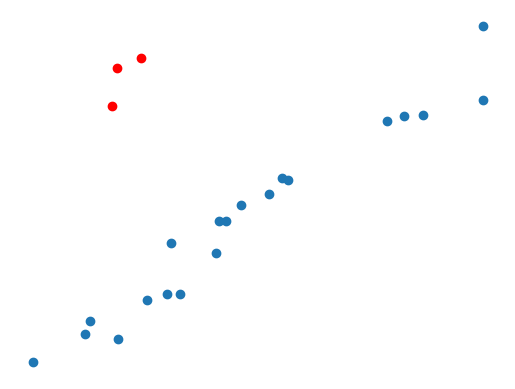

In [16]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/outlier_detect.png")
plt.close()

In [33]:
a, b = np.polyfit(x, y, 1)
a

0.9731142204091661

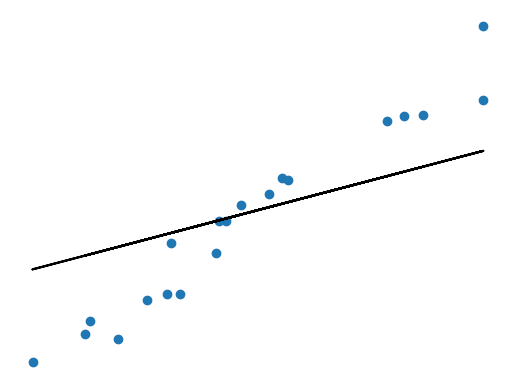

In [42]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.plot(x, b + 0.3 + (a - 0.6) * x, color="k")
#plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/lin_reg.png")
plt.close()

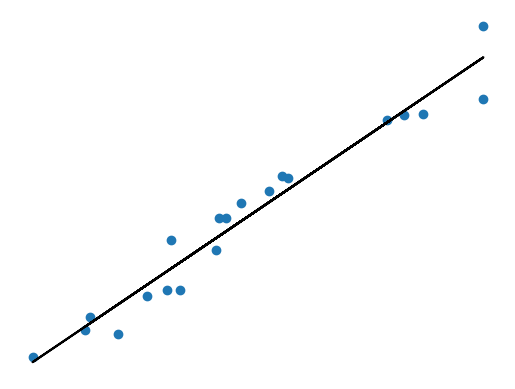

In [43]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.plot(x, b + a * x, color="k")
#plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/lin_reg_correct.png")
plt.close()

# ehhhh some random calculations

In [2]:
full_grid = np.load("grid.npy")
half_grid = np.load("../grid_testing/casey_redo_all_halved.npy")
print(full_grid.shape)
print(half_grid.shape)

(19604, 3)
(14976, 3)


In [4]:
(14976 / 19604) * 100

76.39257294429707

In [5]:
100 - 76.39257294429707

23.607427055702928

In [6]:
1597 / 11100

0.14387387387387388

In [7]:
0.14387387387387388 * 100

14.387387387387388

# 3D viz for select features

In [256]:
# label kwarg and plotter.add_legend() ?
FAD_feats = [9709, 11766, 12520] # 7815, 15271 (the SVRs)

In [257]:
points = grid[FAD_feats]
sub = np.array([i for i in selected if i[0].astype(int) in FAD_feats])
sub_freqs = np.array([float(i[1]) / 24 for i in sub])
sub_freqs

array([0.66666667, 0.54166667, 0.54166667])

In [258]:
cloud = pyvista.PolyData(points)
cloud.point_data["values"] = sub_freqs
cloud["Labels"] = [str(i) for i in FAD_feats]
plotter = pyvista.Plotter()

In [259]:
plotter.background_color = "slategrey"
scargs = {"color": "black"}
plotter.add_points(cloud, render_points_as_spheres=True, cmap="RdYlGn", 
                   clim=[min(sub_freqs), max(sub_freqs)], point_size=15, scalar_bar_args=scargs)
#plotter.add_point_labels(cloud, "Labels", point_size=25, font_size=36, text_color="black")


Actor (0x7f139c7ba620)
  Center:                     (2.459549903869629, 1.8513498306274414, 2.2729000747203827)
  Pickable:                   True
  Position:                   (0.0, 0.0, 0.0)
  Scale:                      (1.0, 1.0, 1.0)
  Visible:                    True
  X Bounds                    4.595E-01, 4.460E+00
  Y Bounds                    -1.487E-01, 3.851E+00
  Z Bounds                    7.729E-01, 3.773E+00
  User matrix:                Unset
  Has mapper:                 True

Property (0x7f139c7ba920)
  Ambient:                     0.0
  Ambient color:               Color(name='white', hex='#ffffffff', opacity=255)
  Anisotropy:                  0.0
  Color:                       Color(name='white', hex='#ffffffff', opacity=255)
  Culling:                     "none"
  Diffuse:                     1.0
  Diffuse color:               Color(name='white', hex='#ffffffff', opacity=255)
  Edge color:                  Color(name='black', hex='#000000ff', opacity=255)
  Inte

In [260]:
ml.visual.backend_pyvista.plot_structure_as_wireframe(plotter, SI_lib["aa_1"][0])

In [261]:
plotter.show()

Widget(value="<iframe src='http://localhost:33757/index.html?ui=P_0x7f13cb1ff3d0_41&reconnect=auto' style='wid…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


11766 is feature above substituent, 12520 is below